# For ava, tune preprocessing params by printing out specgrams

modeled after `tune_syll_preprocessing_params(audio_dirs, seg_dirs, p, img_fn='temp.pdf')` in: \
https://github.com/singingmicelab/autoencoded-vocal-analysis/blob/master/ava/preprocessing/preprocess.py

## Import modules

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [9]:
from ava.models.vae import X_SHAPE
from ava.preprocessing.utils import get_spec
from ava.preprocessing.preprocess import get_audio_seg_filenames, read_onsets_offsets_from_file, get_syll_specs

In [10]:
%matplotlib inline

## ava project path

In [11]:
root = '/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long'
audio_dirs = [os.path.join(root, 'audio')]
seg_dirs = [os.path.join(root, 'segs')]

## preprocess params

In [15]:
preprocess_params = {
    'get_spec': get_spec,
    'max_dur': 0.2, # maximum syllable duration
    'min_freq': 10e3, # minimum frequency
    'max_freq': 100e3, # maximum frequency
    'num_freq_bins': X_SHAPE[0], # hard-coded
    'num_time_bins': X_SHAPE[1], # hard-coded
    'nperseg': 1024, # FFT
    'noverlap': 512, # FFT
    'spec_min_val': 1.5, # minimum log-spectrogram value
    'spec_max_val': 4.5, # maximum log-spectrogram value
    'fs': 250000, # audio samplerate
    'mel': False, # frequency spacing, mel or linear
    'time_stretch': True, # stretch short syllables?
    'within_syll_normalize': True, # normalize spectrogram values on a
                                    # spectrogram-by-spectrogram basis
    'normalize_quantile': 0, # throw away values below this quantile
    'max_num_syllables': None, # maximum number of syllables per directory
    'sigma': 0,  # standard deviation of gaussian smoothing filter
    'sylls_per_file': 1, # syllable per file
    'real_preprocess_params': ('min_freq', 'max_freq', 'spec_min_val', \
            'spec_max_val', 'max_dur'), # tunable parameters
    'int_preprocess_params': ('nperseg','noverlap'), # tunable parameters
    'binary_preprocess_params': ('time_stretch', 'mel', \
            'within_syll_normalize'), # tunable parameters
}

## tune preprocess params

In [16]:
# FROM: tune_syll_preprocessing_params in preprocess.py
# Collect all the relevant filenames.
audio_filenames, seg_filenames = [], []
for audio_dir, seg_dir in zip(audio_dirs, seg_dirs):
    temp_audio, temp_seg = get_audio_seg_filenames(audio_dir, seg_dir, preprocess_params)
    audio_filenames += temp_audio
    seg_filenames += temp_seg
audio_filenames = np.array(audio_filenames)
seg_filenames = np.array(seg_filenames)
assert len(audio_filenames) > 0, "Didn't find any audio files!"

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230118213401_0000146_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230118213401_0000146_030.txt
10754


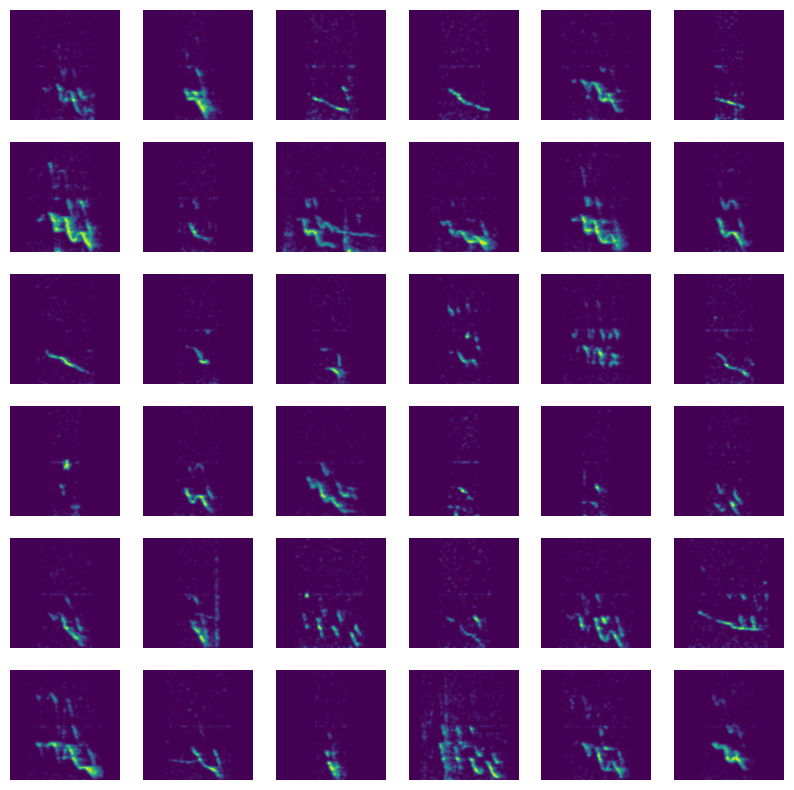

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230118223400_0000147_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230118223400_0000147_030.txt
4949


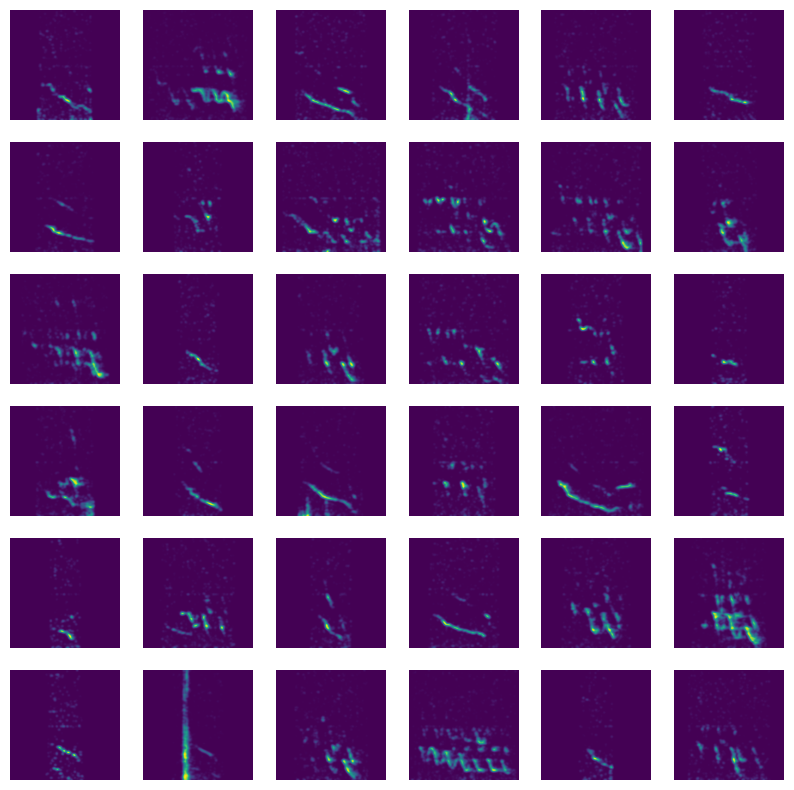

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230118233400_0000148_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230118233400_0000148_030.txt
4230


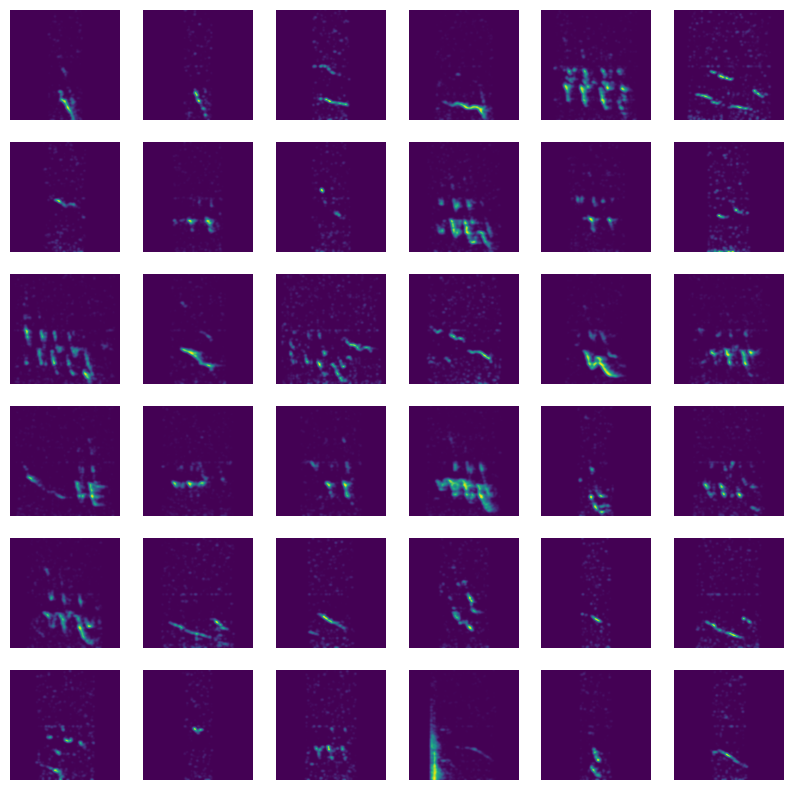

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119003359_0000149_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119003359_0000149_030.txt
2566


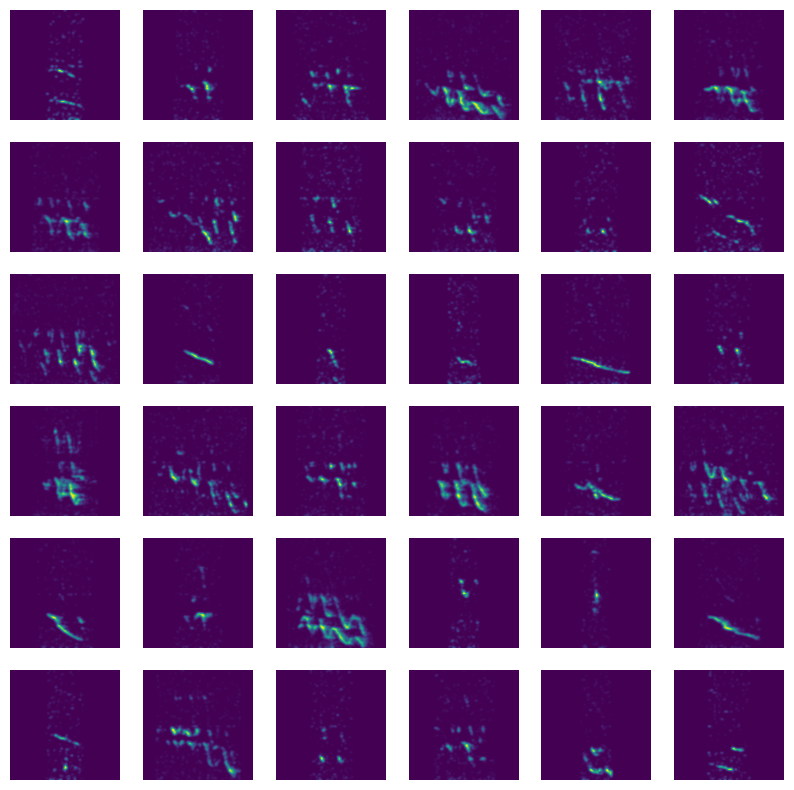

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119013359_0000150_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119013359_0000150_030.txt
2183


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.254399999999805s, max_dur = 0.2s
  warnings.warn(message)


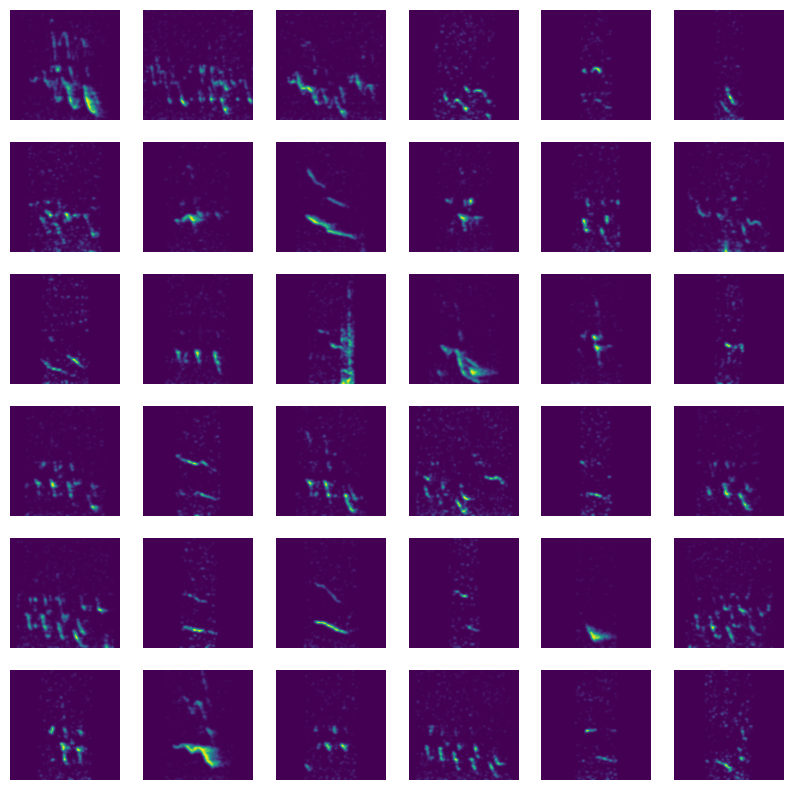

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119023359_0000151_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119023359_0000151_030.txt
1673


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.23600000000010368s, max_dur = 0.2s
  warnings.warn(message)
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.2015000000001237s, max_dur = 0.2s
  warnings.warn(message)
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.24350000000004002s, max_dur = 0.2s
  warnings.warn(message)


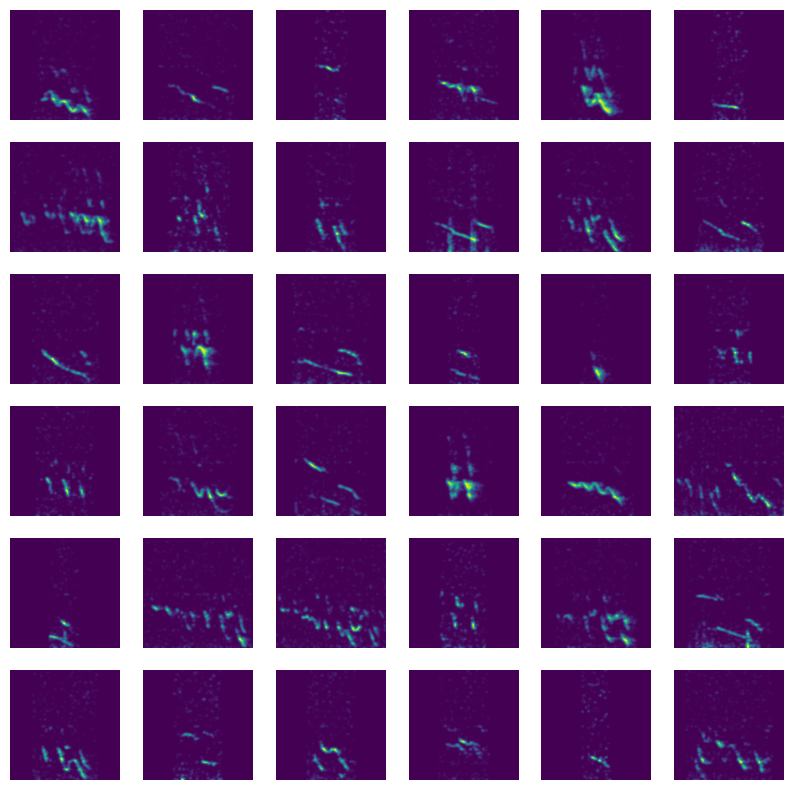

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119033358_0000152_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119033358_0000152_030.txt
1647


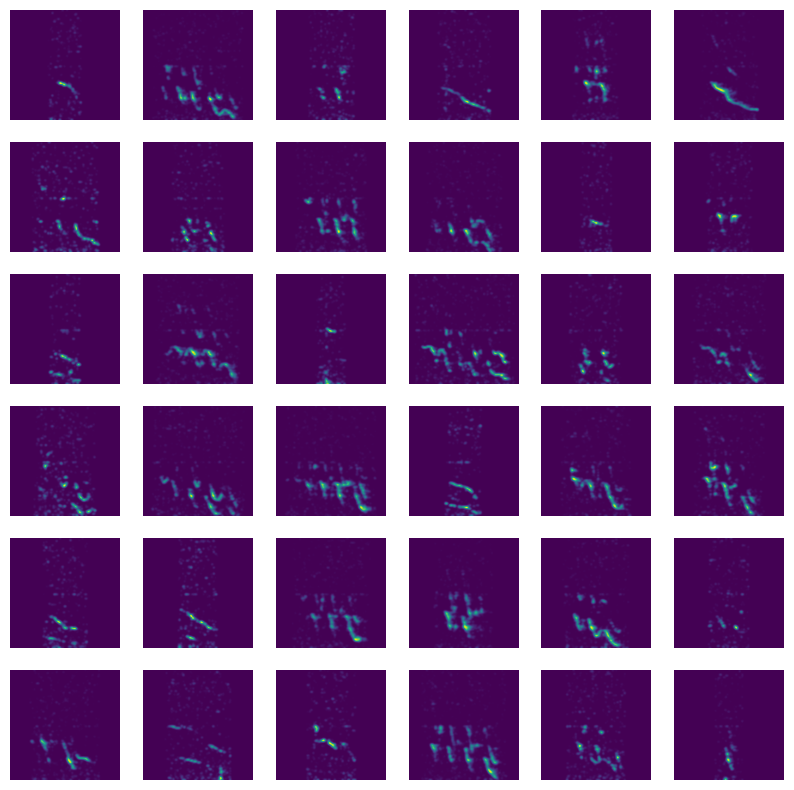

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119043358_0000153_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119043358_0000153_030.txt
2149


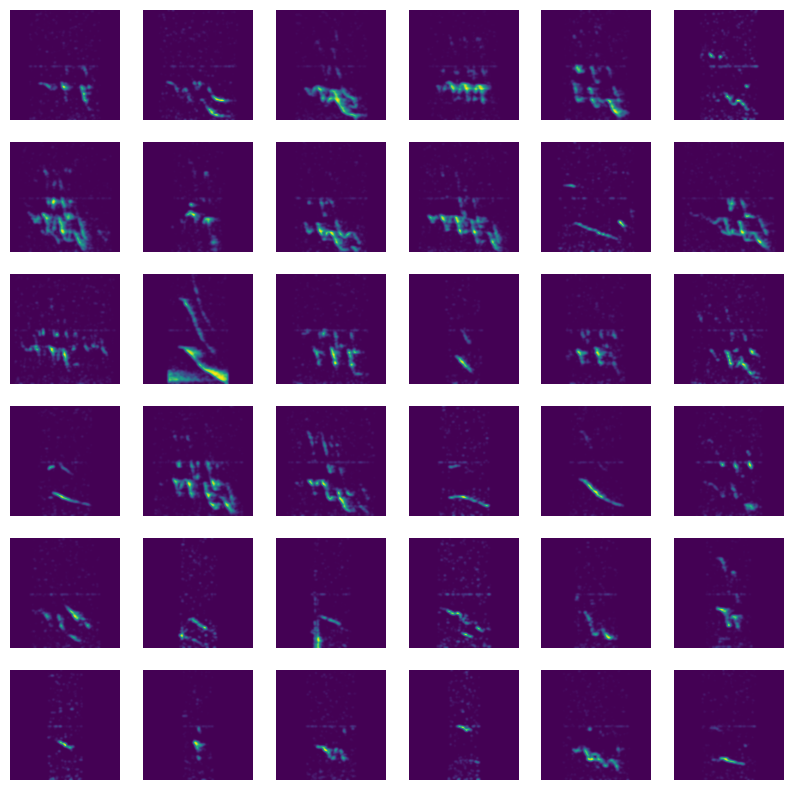

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119053357_0000154_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119053357_0000154_030.txt
3315


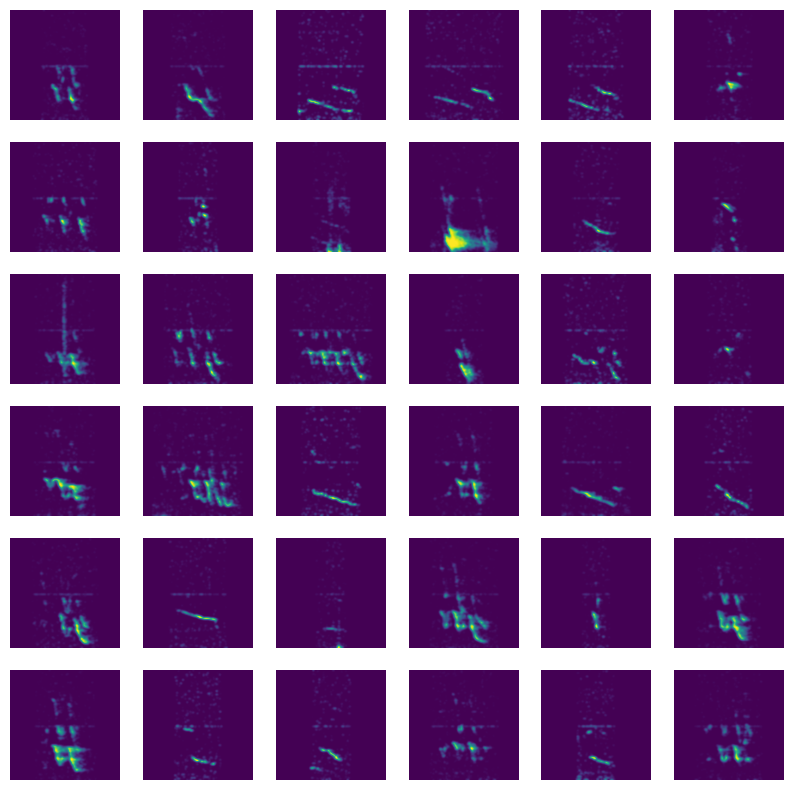

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119063357_0000155_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119063357_0000155_030.txt
1969


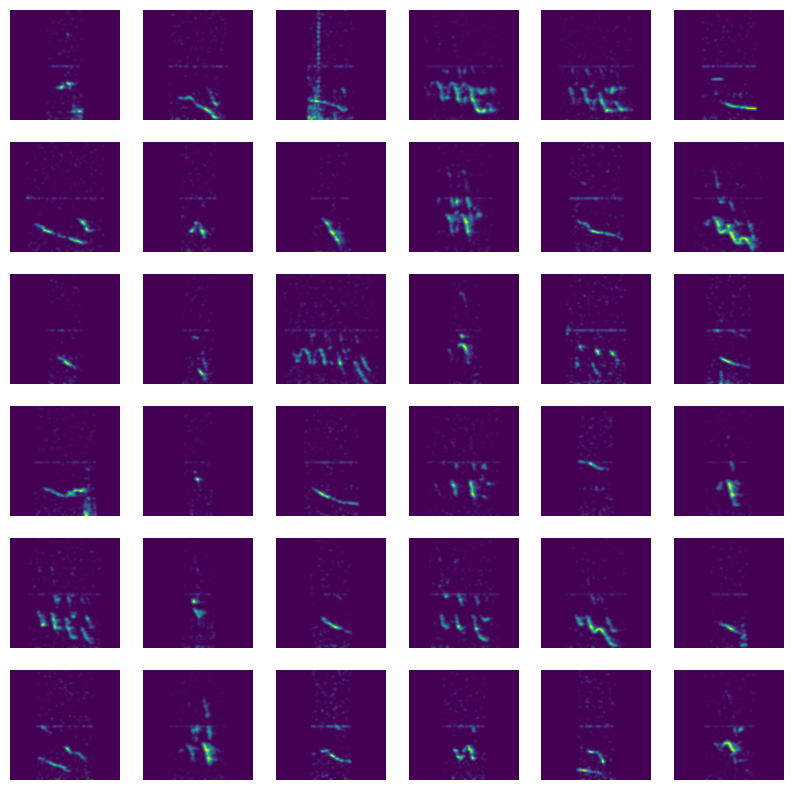

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119073357_0000156_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119073357_0000156_030.txt
1560


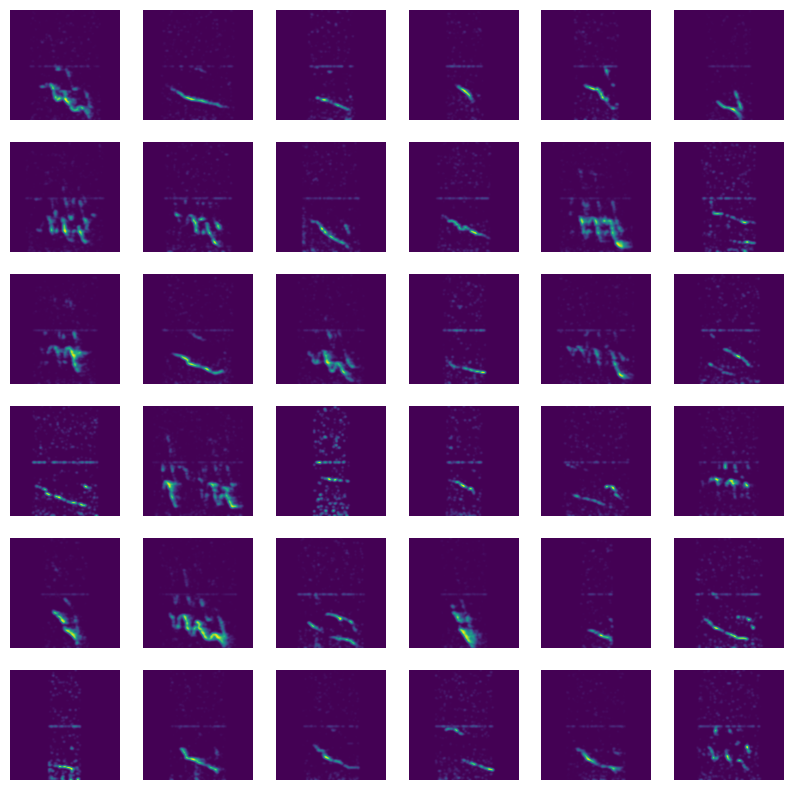

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230119083356_0000157_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230119083356_0000157_030.txt
4131


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.25099999999997635s, max_dur = 0.2s
  warnings.warn(message)


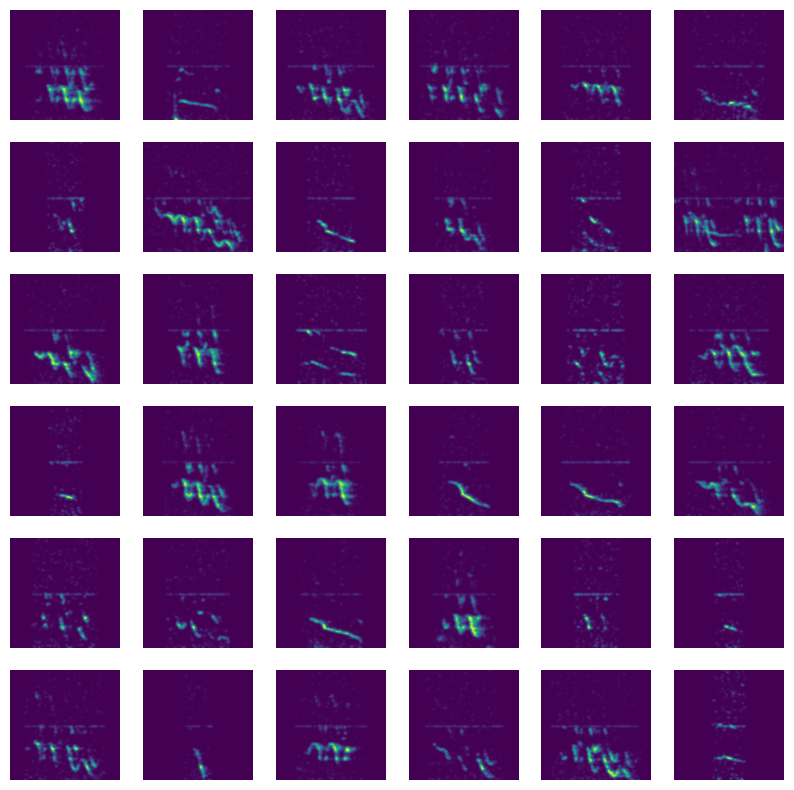

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230118213401_0000146_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230118213401_0000146_030.txt
6035


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.2079999999999984s, max_dur = 0.2s
  warnings.warn(message)


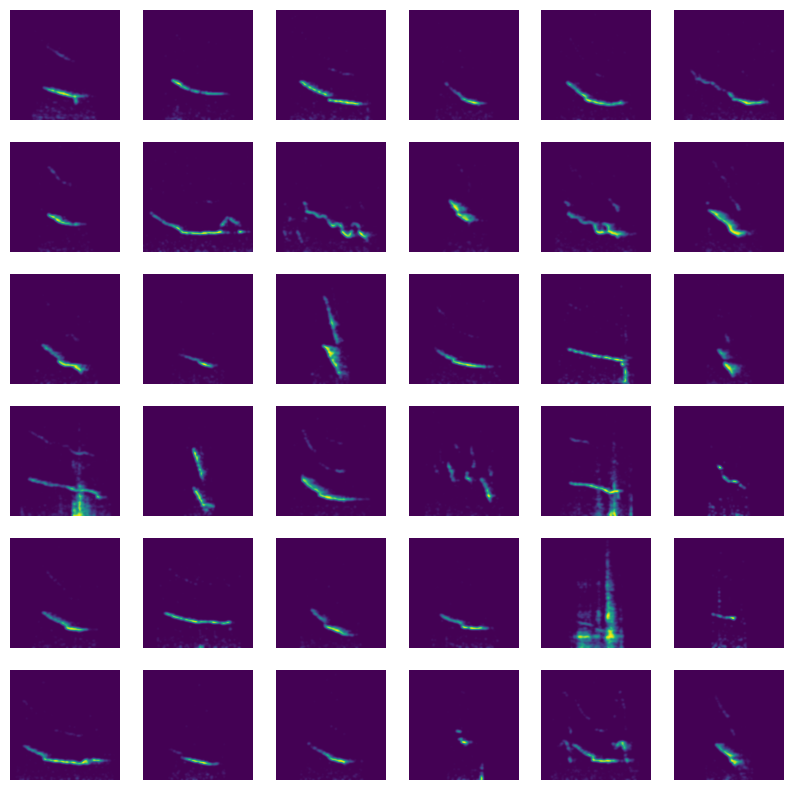

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230118223400_0000147_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230118223400_0000147_030.txt
4631


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.23849999999993088s, max_dur = 0.2s
  warnings.warn(message)
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.27800000000002s, max_dur = 0.2s
  warnings.warn(message)


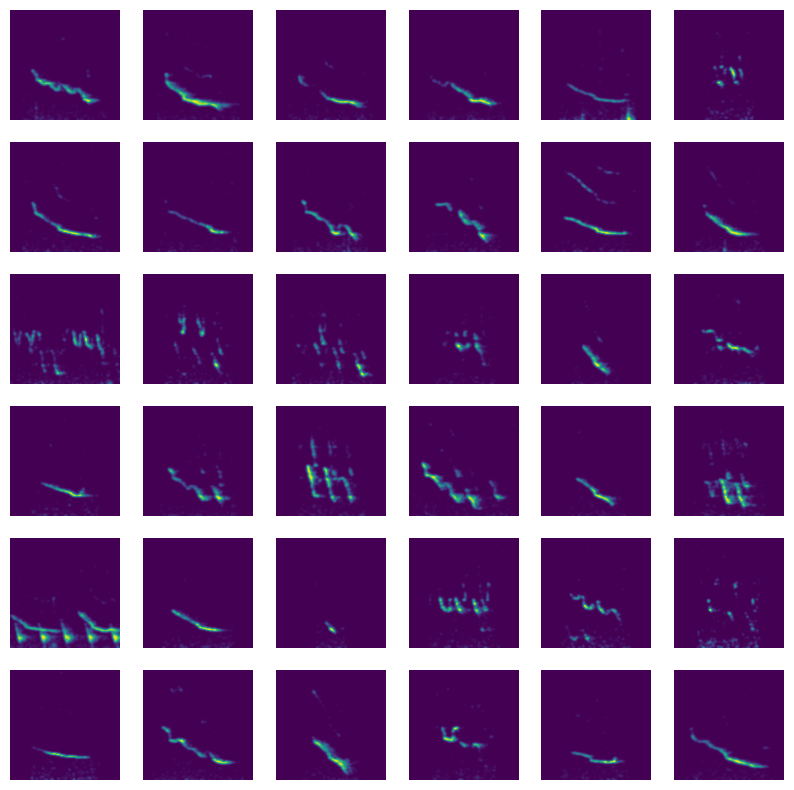

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230118233400_0000148_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230118233400_0000148_030.txt
5552


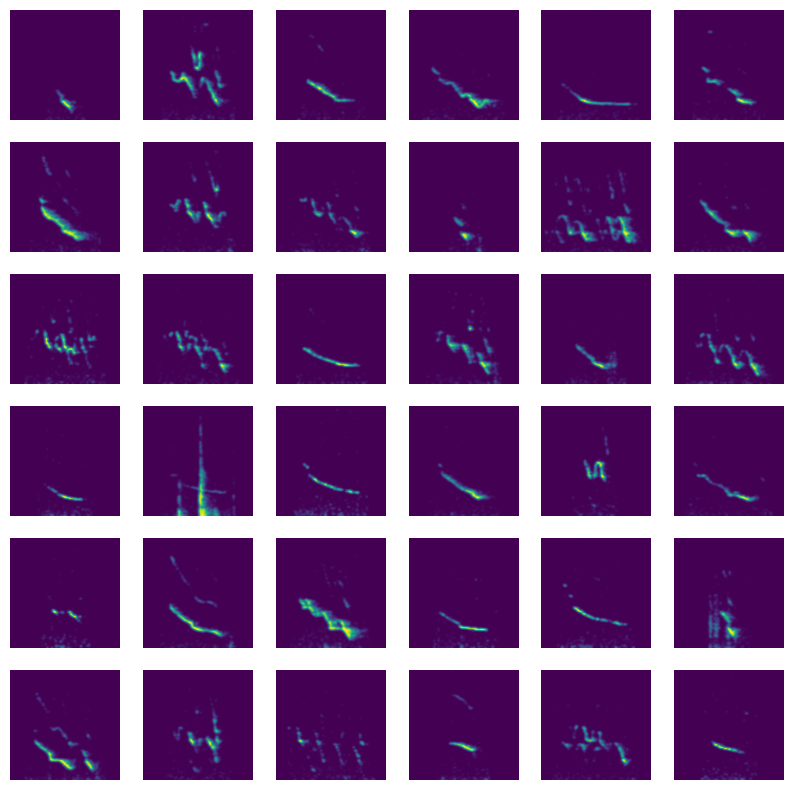

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230119003359_0000149_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230119003359_0000149_030.txt
3066


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.20349999999999824s, max_dur = 0.2s
  warnings.warn(message)


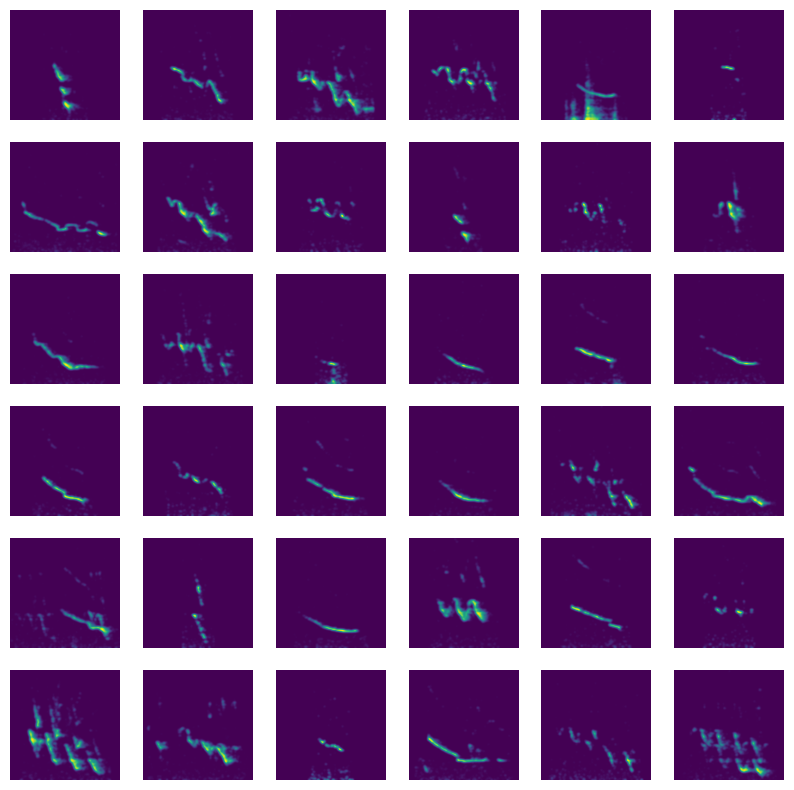

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230119013359_0000150_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230119013359_0000150_030.txt
4225


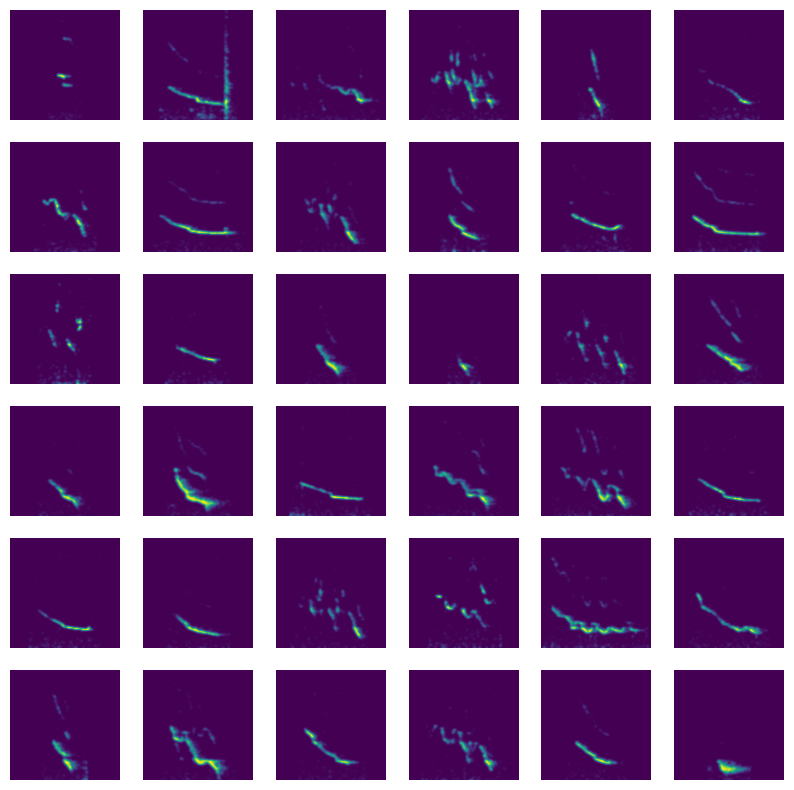

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230119023359_0000151_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230119023359_0000151_030.txt
2633


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.23840000000018335s, max_dur = 0.2s
  warnings.warn(message)


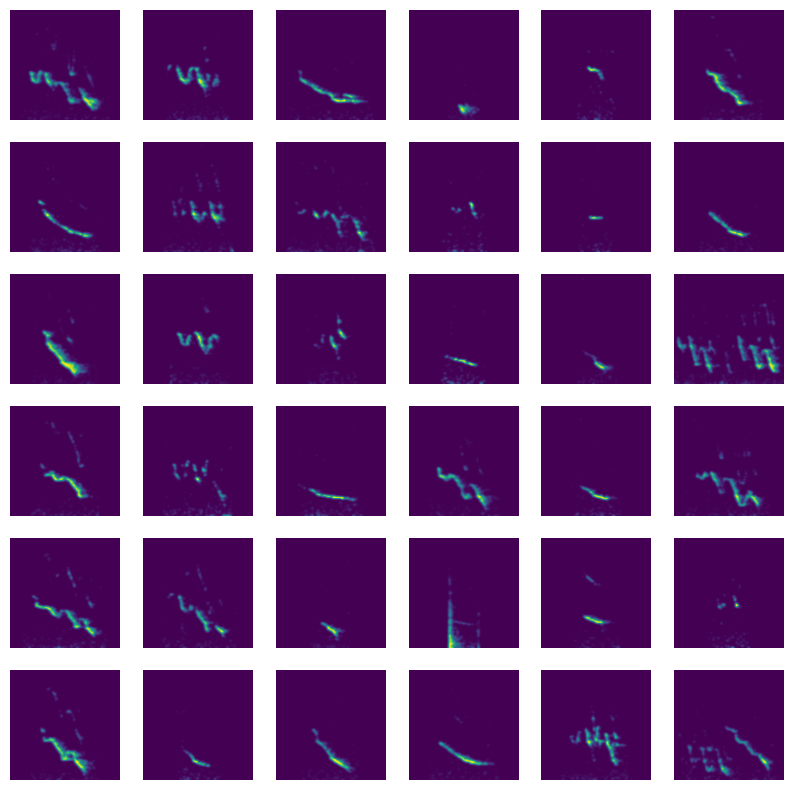

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230119033358_0000152_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230119033358_0000152_030.txt
1990


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.22050000000035652s, max_dur = 0.2s
  warnings.warn(message)


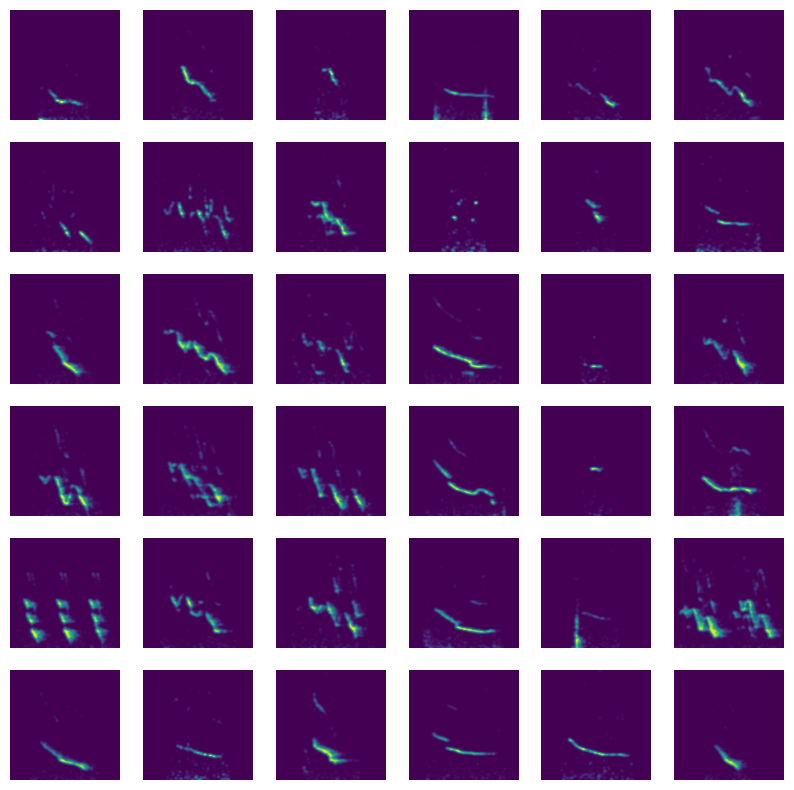

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230119043358_0000153_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230119043358_0000153_030.txt
1767


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.24700000000029831s, max_dur = 0.2s
  warnings.warn(message)


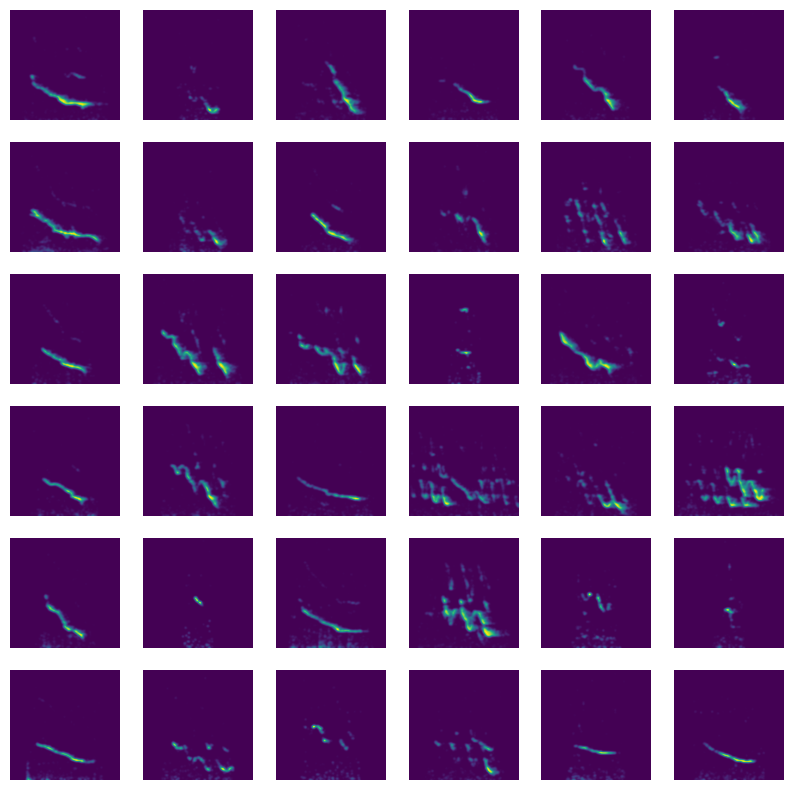

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230119063357_0000155_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230119063357_0000155_030.txt
839


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.22850000000016735s, max_dur = 0.2s
  warnings.warn(message)


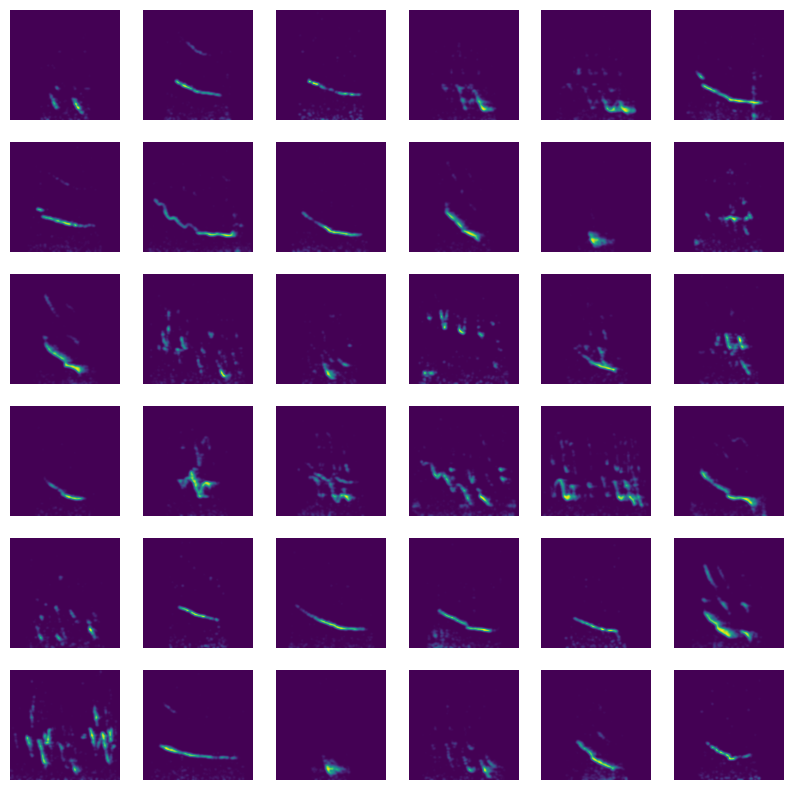

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230119073357_0000156_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230119073357_0000156_030.txt
442


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.2415000000000873s, max_dur = 0.2s
  warnings.warn(message)
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.20400000000017826s, max_dur = 0.2s
  warnings.warn(message)
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.2130000000001928s, max_dur = 0.2s
  warnings.warn(message)


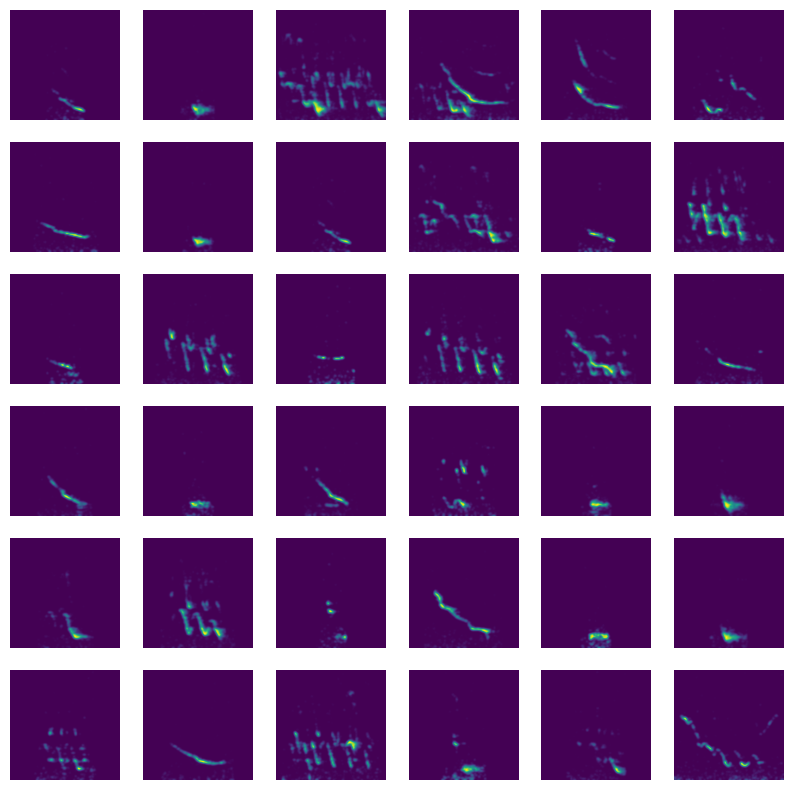

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/r_T230119083356_0000157_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/r_T230119083356_0000157_030.txt
2473


/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.2359999999998763s, max_dur = 0.2s
  warnings.warn(message)
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.27099999999995816s, max_dur = 0.2s
  warnings.warn(message)
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/ava/preprocessing/utils.py:65: UserWarning: Found segment longer than max_dur: 0.24650000000002592s, max_dur = 0.2s
  warnings.warn(message)


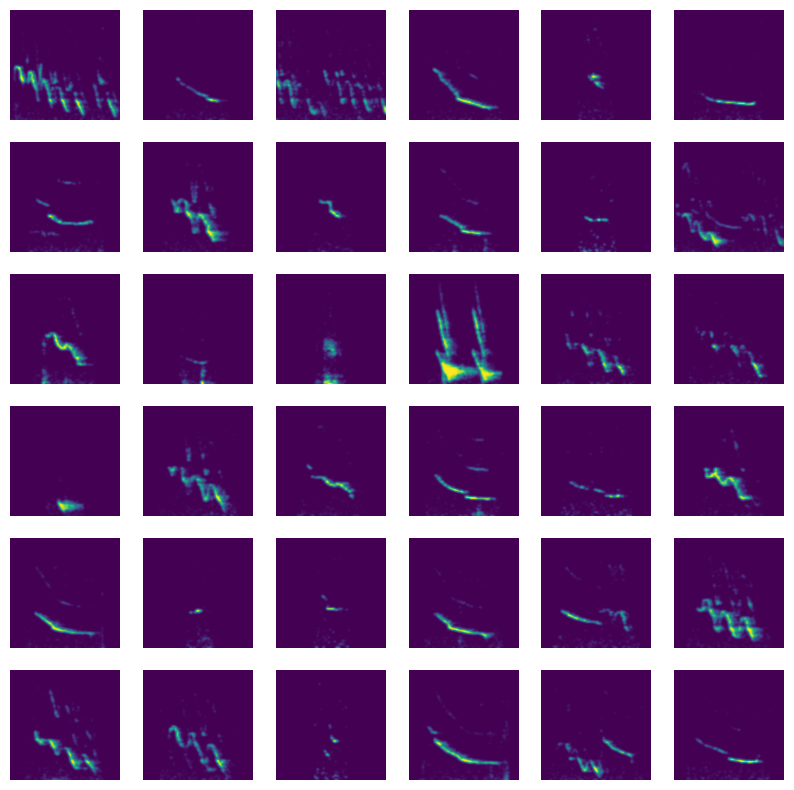

In [14]:
n_rows=6
n_cols=6

for file_index in range(len(audio_filenames)):
    # pick a file
    audio_filename = audio_filenames[file_index]
    seg_filename = seg_filenames[file_index]
    print(audio_filename)
    print(seg_filename)
    # load segmentations
    onsets, offsets = read_onsets_offsets_from_file(seg_filename, preprocess_params)
    print(len(onsets))
    # Grab some random syllable from within the file.
    np.random.seed(42)
    syll_index = np.random.randint(len(onsets), size=n_rows*n_cols)
    example_onsets, example_offsets = onsets[syll_index], offsets[syll_index]
    # Get the preprocessed spectrogram.
    specs, good_sylls = get_syll_specs(example_onsets, example_offsets, audio_filename, preprocess_params)
    specs = [specs[i] for i in good_sylls]
    
    # plot
    fig, axes = plt.subplots(figsize=(10,10), nrows=n_rows, ncols=n_cols)
    for j in range(n_rows):
        for k in range(n_cols):
            i_note = j*n_cols+k
            if i_note < len(specs):
                spec = specs[i_note]
                axes[j,k].imshow(spec, aspect='equal', origin='lower', vmin=0, vmax=1)
            axes[j,k].axis('off')
            
    plt.show()
    

In [ ]:
n_rows=6
n_cols=6

for file_index in range(len(audio_filenames)):
    # pick a file
    audio_filename = audio_filenames[file_index]
    seg_filename = seg_filenames[file_index]
    print(audio_filename)
    print(seg_filename)
    # load segmentations
    onsets, offsets = read_onsets_offsets_from_file(seg_filename, preprocess_params)
    print(len(onsets))
    # Grab some random syllable from within the file.
    np.random.seed(42)
    syll_index = np.random.randint(len(onsets), size=n_rows*n_cols)
    example_onsets, example_offsets = onsets[syll_index], offsets[syll_index]
    # Get the preprocessed spectrogram.
    specs, good_sylls = get_syll_specs(example_onsets, example_offsets, audio_filename, preprocess_params)
    specs = [specs[i] for i in good_sylls]
    
    # plot
    fig, axes = plt.subplots(figsize=(10,10), nrows=n_rows, ncols=n_cols)
    for j in range(n_rows):
        for k in range(n_cols):
            i_note = j*n_cols+k
            if i_note < len(specs):
                spec = specs[i_note]
                axes[j,k].imshow(spec, aspect='equal', origin='lower', vmin=0, vmax=1)
            axes[j,k].axis('off')
            
    plt.show()
    

/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/audio/l_T230118213401_0000146_030.wav
/mnt/labNAS/usv_calls/usv_note_analysis/230118_MZ18_MZ23_1_run5_long/segs/l_T230118213401_0000146_030.txt
10754


In [25]:
len(specs)

36

In [26]:
spec = specs[0]
spec.shape

(128, 128)

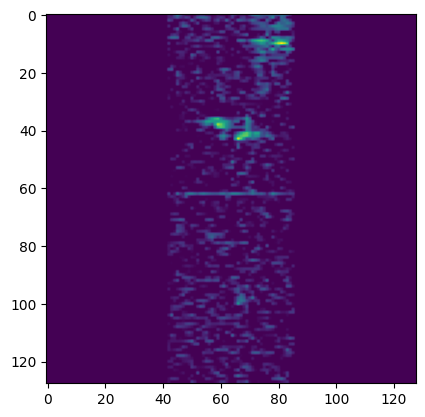

In [27]:
plt.imshow(spec)

In [36]:
spec_filt = gaussian_filter(spec,sigma = preprocess_params['sigma'])
preprocess_params['sigma']

1

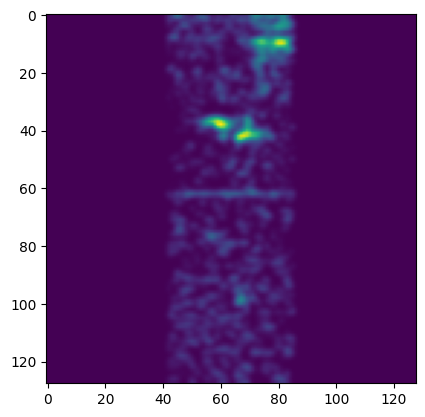

In [37]:
plt.imshow(spec_filt)